# Домашня робота №7

# Перетворення випадкових величин

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
%matplotlib inline

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

$$\int_{0}^{\pi}a sin(x)dx = a(-cos(x))\bigg|^{\pi}_{0} = a(-cos(\pi) + cos(0)) = 2a = 1 \implies a = \frac{1}{2}$$

$$F(x) = 0.5  - 0.5cos(x); 2y = 1 - cos(x); x = arccos(1 - 2y) \implies F^{-1}(x) = arccos(1 - 2y)$$

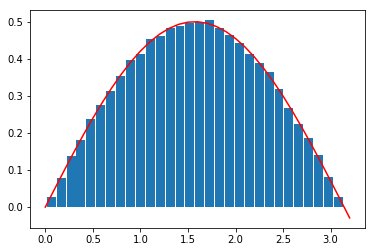

In [16]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

norm = uniform(0, 1)

def tmp(x):
    return np.arccos(1 - 2*x)

def task_1(n):
    x = np.arange(0, np.pi + 0.1, 0.1)
    sin = np.sin(x)/2
    plt.plot(x, sin, 'r')
    res = tmp(norm.rvs(size=n))
    plt.hist(res, density=True, rwidth=0.9, bins=30)
    plt.show()
    
task_1(100000)

### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


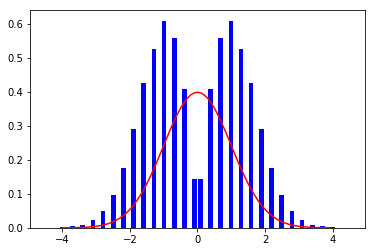

In [38]:
def task_1_2(n):
    def tmp(x):
        return (-2*np.log((2*np.pi)**0.5 * x))**0.5
    
    def clear(data):
        return [i for i in data if not np.isnan(i)]
    
    x = np.arange(-4, 4, 0.1)
    lim = (2*np.pi)**(-0.5)*np.exp(-(x**2)/2)
    plt.plot(x, lim, 'r')
    data = list(map(tmp,norm.rvs(size=n)))
    data = clear(data)
    plt.hist([data,-np.array(data)],color = ['b','b'], density=True, rwidth=0.9, bins=30)
    plt.show()

task_1_2(100000)

## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

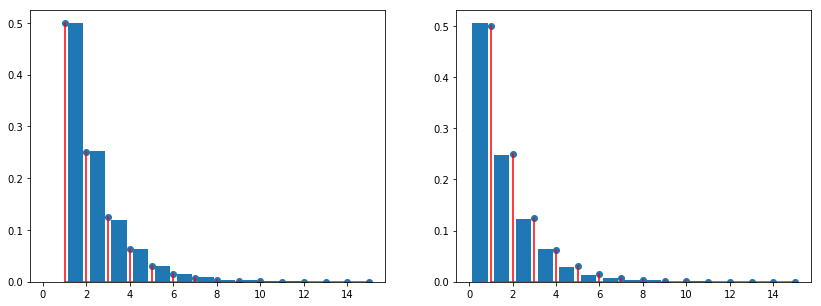

In [44]:
from scipy.stats import geom
g = geom(0.5)
f = plt.gcf()
f.set_size_inches(14, 5)

def task_2(n):
    def tmp():
        return g.rvs(size=n) - 1
    
    def _task_2(func,loc):
        plt.subplot(loc)
        plt.stem(x, g.pmf(x), 'r')
        plt.hist(func, density=True, rwidth=0.7, bins=range(16))
    
    x = np.arange(1, 16) 
    _task_2(g.rvs(size=n),121)
    _task_2(tmp(),122)
    plt.show()

task_2(10000)


## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

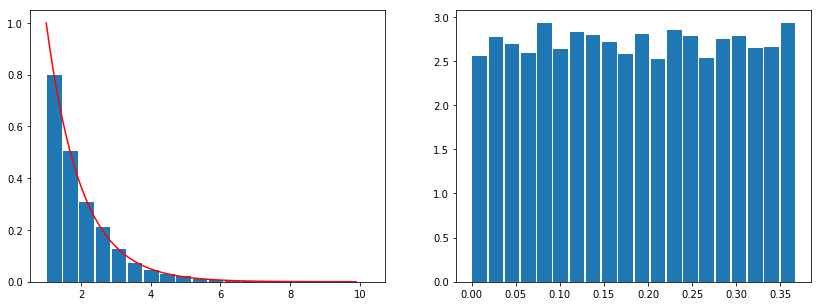

In [48]:
from scipy.stats import expon

e = expon(1)
fig = plt.gcf()
fig.set_size_inches(14, 5)

def task_3_1(n):
    x = np.arange(1, 10, 0.1)
    
    plt.subplot(121)
    plt.hist(e.rvs(size=n), density=True, rwidth=0.9, bins=20)
    plt.plot(x, e.pdf(x), 'r')

    plt.subplot(122)
    plt.hist(np.exp(-e.rvs(size=n)), density=True, rwidth=0.9, bins=20)

    plt.show()

task_3_1(10000)



### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

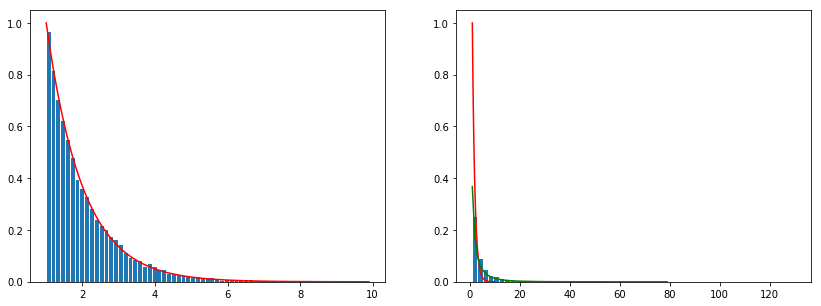

In [67]:
fig = plt.gcf()
fig.set_size_inches(14, 5)

def task_3_2(n):
    x = np.arange(1, 10, 0.1)
    
    plt.subplot(121)
    plt.hist(e.rvs(size=n), density=True, rwidth=0.8, bins=60)
    plt.plot(x, e.pdf(x), 'r')

    plt.subplot(122)
    plt.hist(e.rvs(size=n)**2, density=True, rwidth=0.8, bins=60)
    plt.plot(x, e.pdf(x), 'r')
    plt.plot(y, np.exp(-(y)**0.5)*(y)**(-0.5), 'g')
    plt.show()

task_3_2(10000)

## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

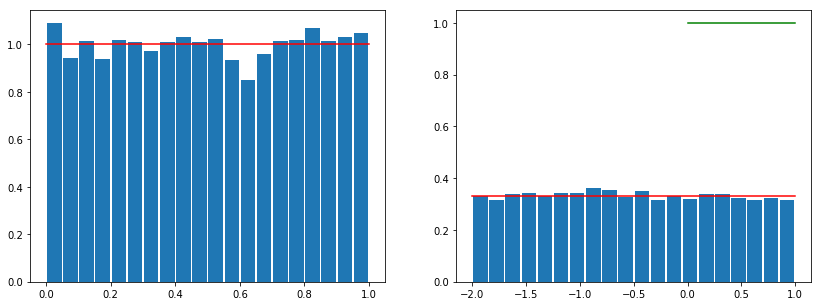

In [74]:
fig = plt.gcf()
fig.set_size_inches(14, 5)
x = np.arange(0, 1.1, 0.1)
e = uniform(0, 1)

def task_4_1(n):
    plt.subplot(121)
    plt.hist(e.rvs(size=n), density=True, rwidth=0.9, bins=20)
    plt.plot(x, e.pdf(x), 'r')

    plt.subplot(122)
    plt.hist(3*e.rvs(size=n) - 2, density=True, rwidth=0.9, bins=20)
    plt.plot(np.arange(-2, 1.1, 0.1), [1/3 for i in range(len(y))],'r')
    plt.plot(x, e.pdf(x), 'g')

    plt.show()
    
task_4_1(10000)

### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

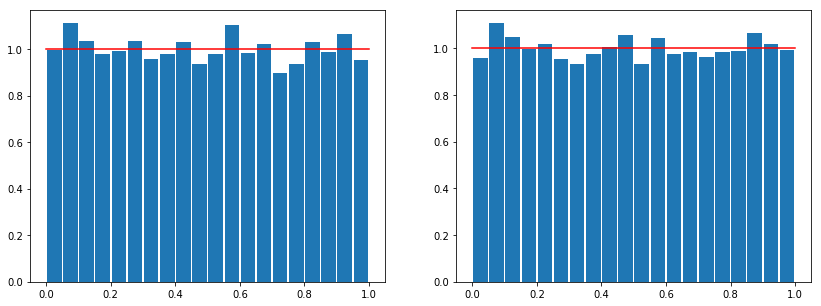

In [77]:
fig = plt.gcf()
fig.set_size_inches(14, 5)

def task_4_2(n):
    plt.subplot(121)
    plt.hist(e.rvs(size=n), density=True, rwidth=0.9, bins=20)
    plt.plot(x, e.pdf(x), 'r')

    plt.subplot(122)
    plt.hist(abs(2*e.rvs(size=n) - 1), density=True, rwidth=0.9, bins=20)
    plt.plot(x, [1]*len(x),'r')

    plt.show()
    
task_4_2(10000)

### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

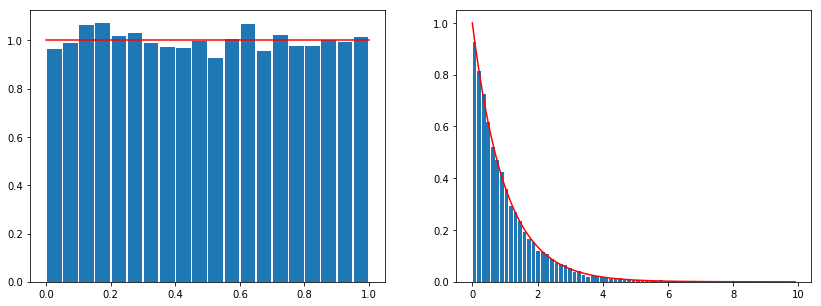

In [84]:
fig = plt.gcf()
fig.set_size_inches(14, 5)

def task_4_3(n):
    plt.subplot(121)
    plt.hist(e.rvs(size=n), density=True, rwidth=0.9, bins=20)
    plt.plot(x, e.pdf(x), 'r')
    
    plt.subplot(122)
    plt.hist(-np.log(e.rvs(size=n)), density=True, rwidth=0.8, bins=60)
    plt.plot(np.arange(0, 10, 0.1), np.exp(-np.arange(0, 10, 0.1)), 'r')
    
    plt.show()

task_4_3(10000)



## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [85]:
def get_ksi(size=1):
    return tuple(zip(uniform(0, 1).rvs(size=size), uniform(0, 1).rvs(size=size)))

Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

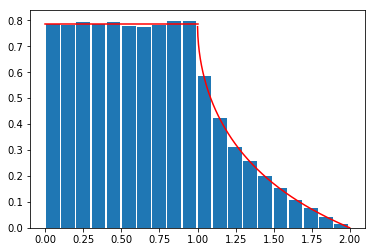

In [101]:
ksi = get_ksi(size=100000)
#------------------------------------------------------------------------
ksi_1 = [ksi[i][0]**2 + ksi[i][1]**2 for i in range(len(ksi))]

x = np.arange(1.0001, 2, 0.001)
x2 = np.arange(0, 1.5, 0.5)

plt.hist(ksi_1, density=True, rwidth=0.9, bins=20)
plt.plot(x, np.pi/4 - np.arccos(x**(-0.5)) -0.5*(x-1)**(-0.5) + 0.5*(x-1)**(-0.5), 'r', x2, [np.pi/4]*len(x2), 'r')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

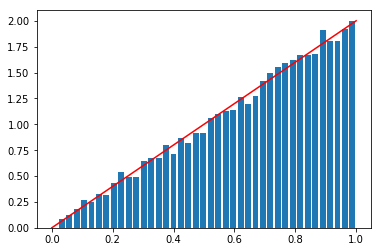

In [96]:
ksi_2 = [max(ksi[i][0], ksi[i][1]) for i in range(len(ksi))]
plt.hist(ksi_2, density=True, rwidth=0.8, bins=40)
x = np.arange(0, 1.1, 0.1)
plt.plot(x, 2*x, 'r')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

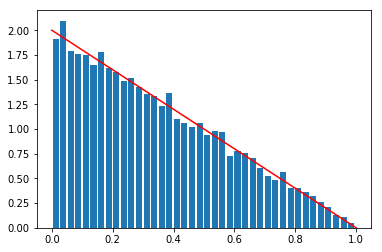

In [97]:
ksi_3 = [abs(ksi[i][0] - ksi[i][1]) for i in range(len(ksi))]
plt.hist(ksi_3, density=True, rwidth=0.8, bins=40)
x = np.arange(0, 1.1, 0.1)
plt.plot(x, -2*x + 2, 'r')
plt.show()